In [1]:
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import zipfile
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils import to_categorical
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


modules loaded


In [2]:
df_train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
df_test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")


In [3]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
img_row , img_col = 28 ,28
input_shape = (img_row, img_col, 1)

In [5]:

X = np.array(df_train.iloc[:, 1:])
Y = to_categorical(np.array(df_train.iloc[:, 0]))
X_train , X_val ,  Y_train , Y_val= train_test_split(X,Y, test_size = 0.2, random_state=42)

In [6]:
X_test = np.array(df_test.iloc[:, 1:])
Y_test = to_categorical(np.array(df_test.iloc[: , 0]))

In [7]:
X_train = X_train.reshape(X_train.shape[0], img_row , img_col , 1)
X_val = X_val.reshape(X_val.shape[0], img_row , img_col , 1)
X_test = X_test.reshape(X_test.shape[0], img_row , img_col , 1)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

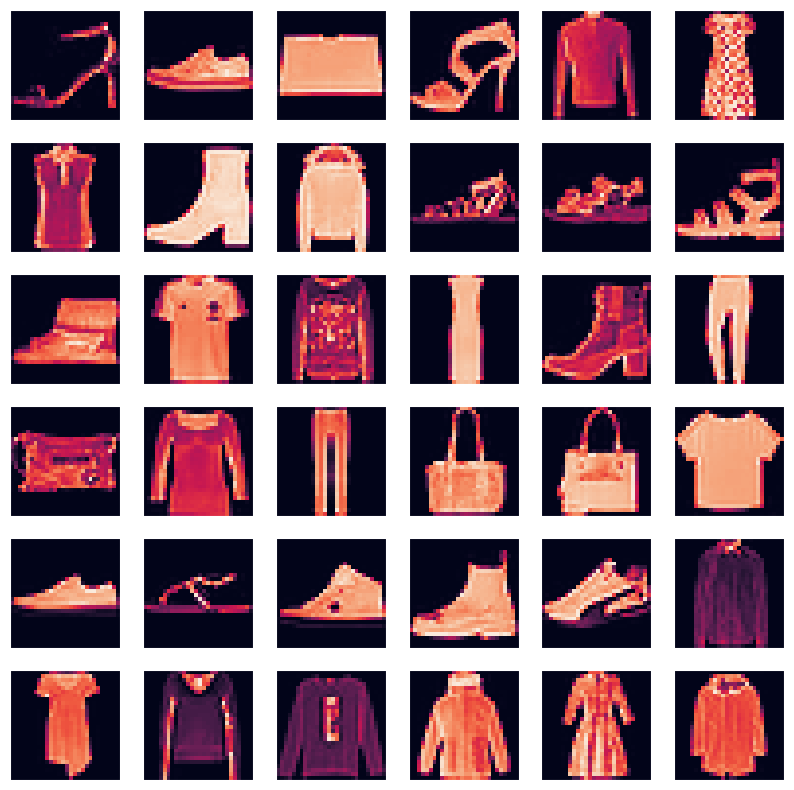

In [9]:
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
plt.show()

In [10]:
batch_size = 256
num_classes = 10
epochs = 50
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu', input_shape = input_shape),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0,30),
    Conv2D(64,(3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0,30),
    Conv2D(128,(3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0,30),
    Dense(256,activation = 'relu'),
    Dropout(rate =0.5,seed = 42),
    Flatten(),
    Dense(num_classes,activation = 'softmax')
])

model.compile(Adam(), loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       2

In [11]:
history = model.fit(X_train, Y_train,
          batch_size=256,
          epochs=30,
          verbose=1,
          validation_data=(X_val, Y_val))

Epoch 1/30


2023-09-12 11:42:02.054392: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


188/188 [==============================] - 13s 14ms/step - loss: 0.6252 - accuracy: 0.7799 - val_loss: 2.1261 - val_accuracy: 0.3993
Epoch 2/30
188/188 [==============================] - 2s 10ms/step - loss: 0.3958 - accuracy: 0.8584 - val_loss: 1.3409 - val_accuracy: 0.5785
Epoch 3/30
188/188 [==============================] - 2s 10ms/step - loss: 0.3403 - accuracy: 0.8756 - val_loss: 0.3850 - val_accuracy: 0.8610
Epoch 4/30
188/188 [==============================] - 2s 10ms/step - loss: 0.2997 - accuracy: 0.8898 - val_loss: 0.3496 - val_accuracy: 0.8683
Epoch 5/30
188/188 [==============================] - 2s 11ms/step - loss: 0.2711 - accuracy: 0.9003 - val_loss: 0.3379 - val_accuracy: 0.8700
Epoch 6/30
188/188 [==============================] - 2s 10ms/step - loss: 0.2520 - accuracy: 0.9082 - val_loss: 0.3036 - val_accuracy: 0.8875
Epoch 7/30
188/188 [==============================] - 2s 10ms/step - loss: 0.2325 - accuracy: 0.9147 - val_loss: 0.3088 - val_accuracy: 0.8882
Epoch 8/3

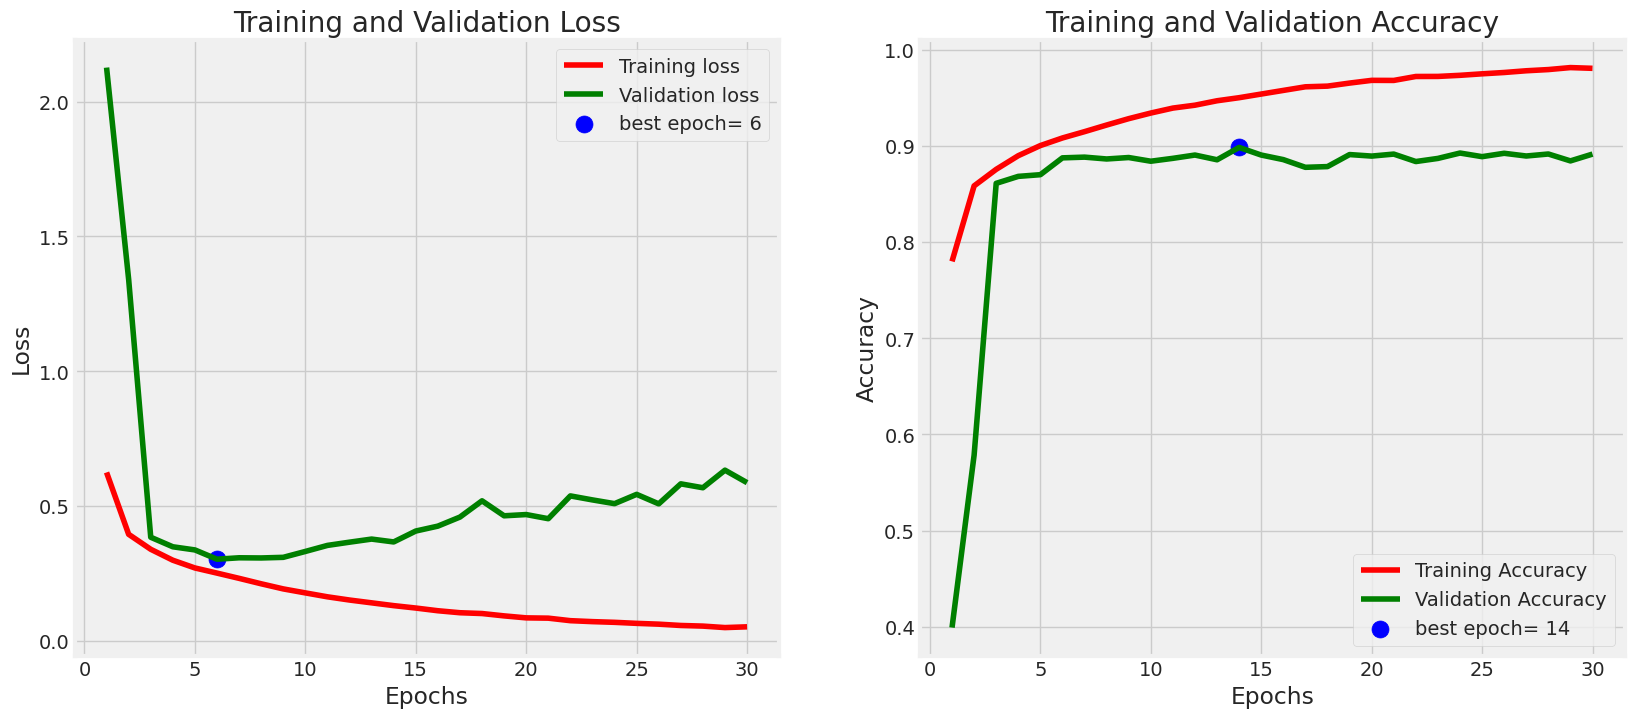

In [12]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5550729036331177
Test accuracy: 0.8988999724388123


In [15]:
#get the predictions for the test data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=-1)

#get the indices to be plotted
y_true = df_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

313/313 [==============================] - 1s 2ms/step


In [16]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.86      0.84      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.87      0.82      0.84      1000
     Class 3       0.92      0.91      0.91      1000
     Class 4       0.87      0.82      0.84      1000
     Class 5       0.96      0.98      0.97      1000
     Class 6       0.70      0.74      0.72      1000
     Class 7       0.96      0.93      0.95      1000
     Class 8       0.96      0.98      0.97      1000
     Class 9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

